In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pickle

In [2]:
# Reading all files
df_matches = pd.read_csv('matches.csv',index_col = 'id')
df_deliveries = pd.read_csv('deliveries.csv')
pd.set_option('display.max_columns',21)

In [3]:
df_matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN


In [4]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [5]:
# No. of matches per season
df_matches.season.value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [6]:
df_matches.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [7]:
df_matches[df_matches['result']== 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [8]:
df_deliveries[(df_deliveries['match_id']==34)&(df_deliveries['is_super_over']==True)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
8097,34,4,Gujarat Lions,Mumbai Indians,1,1,AJ Finch,BB McCullum,JJ Bumrah,1,0,0,0,1,0,0,1,1,NaN,NaN,NaN
8098,34,4,Gujarat Lions,Mumbai Indians,1,2,AJ Finch,BB McCullum,JJ Bumrah,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN
8099,34,4,Gujarat Lions,Mumbai Indians,1,3,BB McCullum,AJ Finch,JJ Bumrah,1,1,0,0,0,0,0,1,1,NaN,NaN,NaN
8100,34,4,Gujarat Lions,Mumbai Indians,1,4,BB McCullum,AJ Finch,JJ Bumrah,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
8101,34,4,Gujarat Lions,Mumbai Indians,1,5,BB McCullum,AJ Finch,JJ Bumrah,1,0,1,0,0,0,0,1,1,NaN,NaN,NaN


In [9]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           636 non-null    int64  
 1   city             629 non-null    object 
 2   date             636 non-null    object 
 3   team1            636 non-null    object 
 4   team2            636 non-null    object 
 5   toss_winner      636 non-null    object 
 6   toss_decision    636 non-null    object 
 7   result           636 non-null    object 
 8   dl_applied       636 non-null    int64  
 9   winner           633 non-null    object 
 10  win_by_runs      636 non-null    int64  
 11  win_by_wickets   636 non-null    int64  
 12  player_of_match  633 non-null    object 
 13  venue            636 non-null    object 
 14  umpire1          635 non-null    object 
 15  umpire2          635 non-null    object 
 16  umpire3          0 non-null      float64
dtypes: float64(1), i

In [10]:
# finding null values in cities
df_matches[df_matches['city'].isna()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


As the Venue in all of above data is Dubai International Cricket Stadium the city name will be Dubai

In [11]:
df_matches.loc[[462,463,467,469,470,475,477],'city'] = 'Dubai'

In [12]:
df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai'], dtype=object)

In [13]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           636 non-null    int64  
 1   city             636 non-null    object 
 2   date             636 non-null    object 
 3   team1            636 non-null    object 
 4   team2            636 non-null    object 
 5   toss_winner      636 non-null    object 
 6   toss_decision    636 non-null    object 
 7   result           636 non-null    object 
 8   dl_applied       636 non-null    int64  
 9   winner           633 non-null    object 
 10  win_by_runs      636 non-null    int64  
 11  win_by_wickets   636 non-null    int64  
 12  player_of_match  633 non-null    object 
 13  venue            636 non-null    object 
 14  umpire1          635 non-null    object 
 15  umpire2          635 non-null    object 
 16  umpire3          0 non-null      float64
dtypes: float64(1), i

No data found in Umpire 3 so i just deleted the whole column

In [14]:
df_matches.drop('umpire3',axis = 1,inplace = True)

In [15]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           636 non-null    int64 
 1   city             636 non-null    object
 2   date             636 non-null    object
 3   team1            636 non-null    object
 4   team2            636 non-null    object
 5   toss_winner      636 non-null    object
 6   toss_decision    636 non-null    object
 7   result           636 non-null    object
 8   dl_applied       636 non-null    int64 
 9   winner           633 non-null    object
 10  win_by_runs      636 non-null    int64 
 11  win_by_wickets   636 non-null    int64 
 12  player_of_match  633 non-null    object
 13  venue            636 non-null    object
 14  umpire1          635 non-null    object
 15  umpire2          635 non-null    object
dtypes: int64(4), object(12)
memory usage: 104.5+ KB


In [16]:
df_matches[df_matches['umpire1'].isna()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


The umpires in this match are searched through google(Cricbuzz) and fill it here

In [17]:
df_matches.loc[5,['umpire1','umpire2']]=['S Ravi','VK Sharma ']

In [18]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           636 non-null    int64 
 1   city             636 non-null    object
 2   date             636 non-null    object
 3   team1            636 non-null    object
 4   team2            636 non-null    object
 5   toss_winner      636 non-null    object
 6   toss_decision    636 non-null    object
 7   result           636 non-null    object
 8   dl_applied       636 non-null    int64 
 9   winner           633 non-null    object
 10  win_by_runs      636 non-null    int64 
 11  win_by_wickets   636 non-null    int64 
 12  player_of_match  633 non-null    object
 13  venue            636 non-null    object
 14  umpire1          636 non-null    object
 15  umpire2          636 non-null    object
dtypes: int64(4), object(12)
memory usage: 104.5+ KB


In [19]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [20]:
df_matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,S Ravi,VK Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin


In [21]:
years = df_matches.season.unique().tolist()

def result_year(year):
    if year in years:
        result_season = df_matches.groupby('season')['winner'].value_counts(normalize = True).loc[year]
        plt.pie(result_season,labels = result_season.index,autopct = '%1.2f%%')
        plt.show()
    else:
        print('Not applicable year')




Which year result do you want to see? 2017


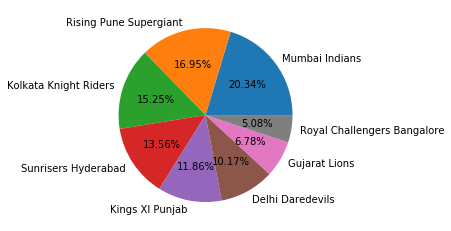

In [22]:
year = int(input('Which year result do you want to see? '))
result_year(year)

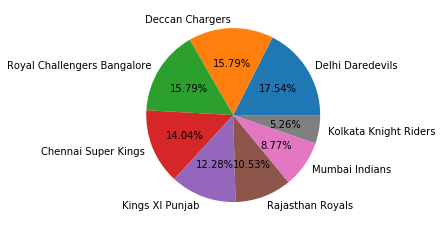

In [23]:
result_season = df_matches.groupby('season')['winner'].value_counts(normalize = True).loc[2009]
plt.pie(result_season,labels = result_season.index,autopct = '%1.2f%%')
plt.show()

In [24]:
result_season

winner
Delhi Daredevils               0.175439
Deccan Chargers                0.157895
Royal Challengers Bangalore    0.157895
Chennai Super Kings            0.140351
Kings XI Punjab                0.122807
Rajasthan Royals               0.105263
Mumbai Indians                 0.087719
Kolkata Knight Riders          0.052632
Name: winner, dtype: float64

In [25]:
df_matches[(df_matches['season']==2008)&(df_matches['dl_applied']==1)]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
100,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen
103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan


In [26]:
years.sort()
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

Checking the formula of win toss and win match in IPL

In [27]:
win_toss_win_match = []
win_toss_lose_match = []
for year in years:
        win_toss_win_match.append(df_matches[(df_matches['season']==year)&(df_matches['winner']==df_matches['toss_winner'])]['season'].count())
        win_toss_lose_match.append(df_matches[(df_matches['season']==year)&(df_matches['winner']!=df_matches['toss_winner'])]['season'].count())
        
print(win_toss_win_match,win_toss_lose_match)        

[28, 33, 31, 38, 33, 36, 30, 28, 34, 34] [30, 24, 29, 35, 41, 40, 30, 31, 26, 25]


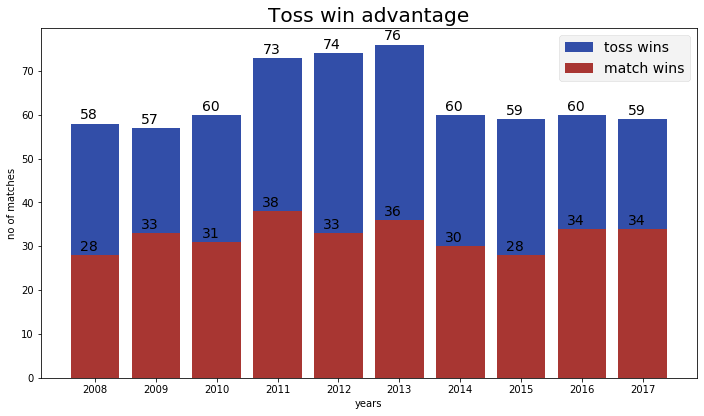

In [28]:
fig,ax = plt.subplots(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax.bar(years,df_matches.season.value_counts(sort = False),color = '#324ea8',label = 'toss wins')
ax.bar(years,win_toss_win_match,color = '#a83632', label = 'match wins')
ax.legend()
ax.set_title('Toss win advantage')
ax.set_xticks(years)
ax.set_xlabel('years')
ax.set_ylabel('no of matches')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.tight_layout()
plt.show()

In [29]:
season_match = df_matches.season.value_counts(sort=False).tolist()

In [30]:
sum=0
for i,j in zip(win_toss_win_match,season_match):
    sum = (i/j)*100 + sum
avg = sum/len(season_match)    

In [31]:
avg

51.360648817489015

51.36% clearly states that toss doesn't matter in winning

Checking which IPL team take most home advantage(winning most matches at home)

In [32]:
teams = {
    'Chennai':'Chennai Super Kings',
    'Mumbai':'Mumbai Indians',
    'Delhi'  :'Delhi Daredevils',
    'Kolkata':'Kolkata Knight Riders',
    'Hyderabad':'Sunrisers Hyderabad',
    'Bangalore':'Royal Challengers Bangalore',
    'Chandigarh':'Kings XI Punjab',
    'Jaipur'  :'Rajasthan Royals'
}
home_win = []
home_matches = []
for city,team in teams.items():
    home_win.append(df_matches.city[(df_matches['city']==city) & (df_matches['winner']==team)].count())
    home_matches.append(df_matches[(df_matches['city']==city)&((df_matches['team1']==team)|(df_matches['team2']==team))].city.count())

In [33]:
home_win

[33, 45, 23, 37, 20, 30, 22, 24]

In [34]:
home_matches

[47, 68, 56, 58, 30, 62, 46, 33]

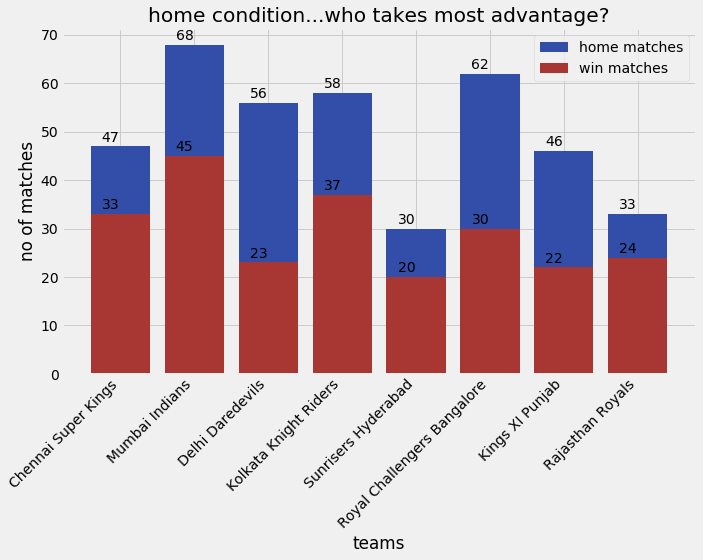

In [35]:
fig,ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
ax.bar(teams.values(),home_matches,color = '#324ea8',label = 'home matches')
ax.bar(teams.values(),home_win,color = '#a83632', label = 'win matches')
ax.set_xticklabels(teams.values(),rotation = 45,horizontalalignment = 'right')
ax.legend()
ax.set_title('home condition...who takes most advantage?')
ax.set_xlabel('teams')
ax.set_ylabel('no of matches')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [36]:
print(df_matches[(df_matches['city']=='Kolkata')&((df_matches['team1']=='Kolkata Knight Riders')|(df_matches['team2']=='Kolkata Knight Riders'))].city.count())
print(df_matches[(df_matches['city']=='Kolkata')&(df_matches['winner']=='Kolkata Knight Riders')].city.count())

58
37


Total Matches for Rajasthan too low because after 2014 he does not play any matches in Jaipur

In [37]:
df_matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)
df_deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)

In [38]:
df_matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,S Ravi,VK Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin


In [39]:
df_matches['umpire2'].value_counts().nlargest(10)

SJA Taufel       54
C Shamshuddin    50
S Ravi           49
RJ Tucker        38
CK Nandan        36
RB Tiffin        30
VA Kulkarni      28
SK Tarapore      26
BNJ Oxenford     25
AM Saheba        23
Name: umpire2, dtype: int64

In [40]:
df_matches['umpire1'].value_counts().nlargest(10)

HDPK Dharmasena    73
Asad Rauf          51
AK Chaudhary       43
Aleem Dar          38
S Ravi             37
BF Bowden          37
BR Doctrove        34
M Erasmus          32
RE Koertzen        20
S Asnani           19
Name: umpire1, dtype: int64

In [41]:
umpire2_list = df_matches['umpire2'].value_counts().nlargest(10).index.tolist()
umpire1_list = df_matches['umpire1'].value_counts().nlargest(10).index.tolist()
set1 = set(umpire1_list)
set2 = set(umpire2_list)
umpire_list = umpire2_list + list(set1 - set2)
print(umpire_list)

['SJA Taufel', 'C Shamshuddin', 'S Ravi', 'RJ Tucker', 'CK Nandan', 'RB Tiffin', 'VA Kulkarni', 'SK Tarapore', 'BNJ Oxenford', 'AM Saheba', 'BR Doctrove', 'HDPK Dharmasena', 'Asad Rauf', 'S Asnani', 'M Erasmus', 'RE Koertzen', 'BF Bowden', 'AK Chaudhary', 'Aleem Dar']


In [42]:
matches_umpire = []
for umpire in umpire_list:
    matches_umpire.append(df_matches[(df_matches['umpire1']==umpire)|(df_matches['umpire2']==umpire)].season.count())

In [43]:
# to convert lists to dictionary 
dict_umpire = dict(zip(umpire_list, matches_umpire))
dict_umpire

{'SJA Taufel': 55,
 'C Shamshuddin': 56,
 'S Ravi': 86,
 'RJ Tucker': 38,
 'CK Nandan': 41,
 'RB Tiffin': 30,
 'VA Kulkarni': 39,
 'SK Tarapore': 31,
 'BNJ Oxenford': 32,
 'AM Saheba': 26,
 'BR Doctrove': 42,
 'HDPK Dharmasena': 87,
 'Asad Rauf': 51,
 'S Asnani': 30,
 'M Erasmus': 54,
 'RE Koertzen': 41,
 'BF Bowden': 37,
 'AK Chaudhary': 58,
 'Aleem Dar': 38}

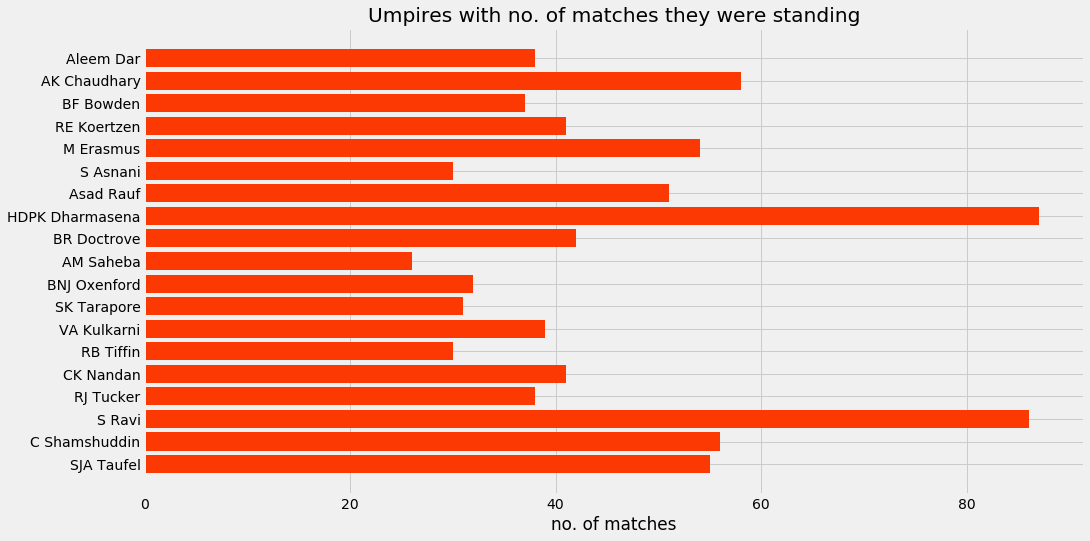

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.barh(list(dict_umpire.keys()),list(dict_umpire.values()),color = '#fc3903')
plt.title('Umpires with no. of matches they were standing')
plt.xlabel('no. of matches')
plt.show()

In [45]:
df_matches[(df_matches['umpire1']=='SJA Taufel')|(df_matches['umpire2']=='SJA Taufel')].season.count()

55

In [46]:
df_matches.groupby('city')['season'].count().sort_values()

city
Bloemfontein       2
Nagpur             3
Kimberley          3
East London        3
Kanpur             4
Indore             5
Kochi              5
Raipur             6
Sharjah            6
Ranchi             7
Port Elizabeth     7
Abu Dhabi          7
Cape Town          7
Cuttack            7
Dubai              7
Johannesburg       8
Dharamsala         9
Rajkot            10
Visakhapatnam     11
Ahmedabad         12
Centurion         12
Durban            15
Pune              32
Jaipur            33
Chandigarh        46
Chennai           48
Hyderabad         49
Delhi             60
Kolkata           61
Bangalore         66
Mumbai            85
Name: season, dtype: int64

In [47]:
df_matches.groupby('season')['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
Name: toss_decision, dtype: int64

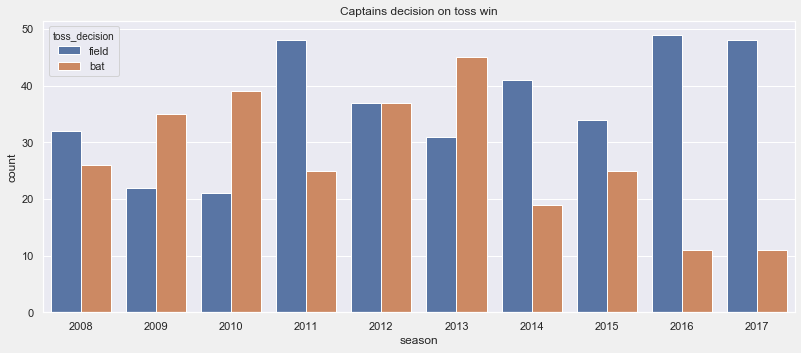

In [48]:
plt.figure(figsize = (12,5))
sns.set(style = 'darkgrid')
sns.countplot(x='season',hue = 'toss_decision',data = df_matches)
plt.title('Captains decision on toss win')
plt.show()

In [49]:
print(df_matches[(df_matches['winner']==df_matches['toss_winner'])&(df_matches['toss_decision']=='field')]['season'].count())
print(df_matches[(df_matches['winner']==df_matches['toss_winner'])&(df_matches['toss_decision']=='bat')]['season'].count())

201
124


In [50]:
(df_matches['toss_decision'].value_counts())/636*100

field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64

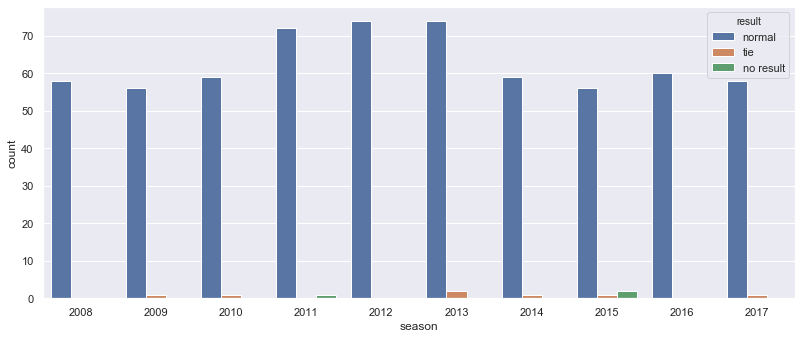

In [51]:
plt.figure(figsize = (12,5))
sns.set(style = 'darkgrid')
sns.countplot(x='season',hue = 'result',data = df_matches)
plt.show()

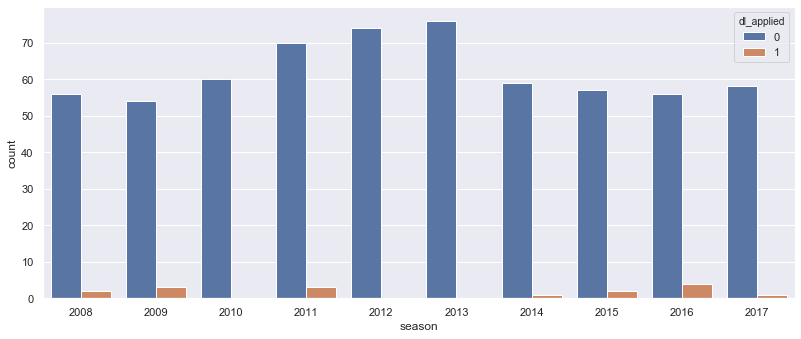

In [52]:
plt.figure(figsize = (12,5))
sns.set(style = 'darkgrid')
sns.countplot(x='season',hue = 'dl_applied',data = df_matches)
plt.show()

In [53]:
df_matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

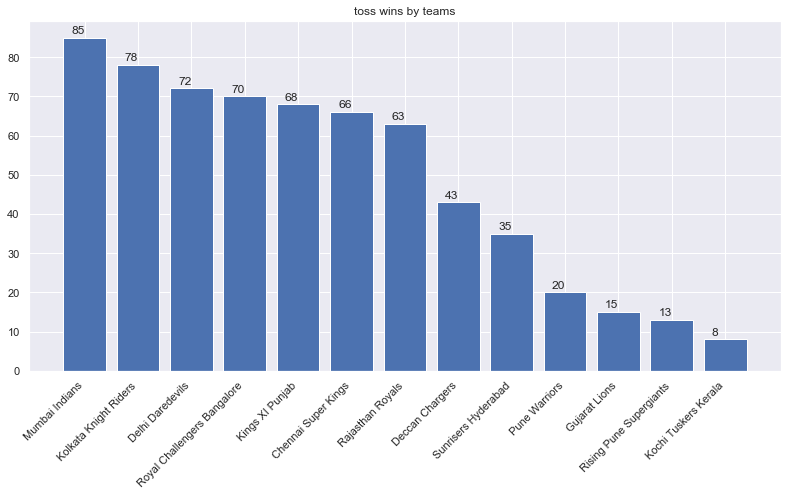

In [54]:
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(df_matches['toss_winner'].value_counts().index,df_matches['toss_winner'].value_counts())
ax.set_xticklabels(df_matches['toss_winner'].value_counts().index,rotation =45,horizontalalignment = 'right')
ax.set_title('toss wins by teams')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [55]:
df_matches.groupby('win_by_wickets')['winner'].value_counts()
# pd.set_option('display.max_row',102)

win_by_wickets  winner                     
0               Mumbai Indians                 48
                Chennai Super Kings            46
                Kings XI Punjab                34
                Kolkata Knight Riders          31
                Royal Challengers Bangalore    31
                                               ..
10              Kings XI Punjab                 1
                Kolkata Knight Riders           1
                Mumbai Indians                  1
                Rajasthan Royals                1
                Sunrisers Hyderabad             1
Name: winner, Length: 102, dtype: int64

In [56]:
df_matches['player_of_match'].value_counts().nlargest(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

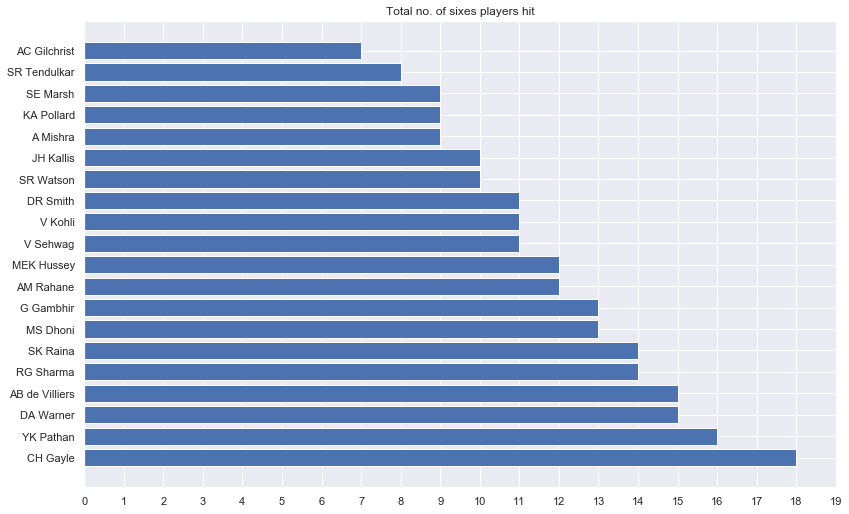

In [57]:
plt.figure(figsize=(12,8))
plt.barh(df_matches['player_of_match'].value_counts().nlargest(20).index,df_matches['player_of_match'].value_counts().nlargest(20))
plt.xticks(range(20))
plt.title('Total no. of sixes players hit')
plt.show()

In [58]:
# df_matches['winner'].value_counts().idxmax()
df_matches['winner'].value_counts().nlargest(12)

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Name: winner, dtype: int64

In [59]:
for team in teams.values():
    print(df_matches[(df_matches['team1']==team)|(df_matches['team2']==team)].city.count(),team)

131 Chennai Super Kings
157 Mumbai Indians
147 Delhi Daredevils
148 Kolkata Knight Riders
76 Sunrisers Hyderabad
152 Royal Challengers Bangalore
148 Kings XI Punjab
118 Rajasthan Royals


In [60]:
pd.concat([df_matches['team1'],df_matches['team2']]).value_counts().nlargest(12)

Mumbai Indians                 157
Royal Challengers Bangalore    152
Kings XI Punjab                148
Kolkata Knight Riders          148
Delhi Daredevils               147
Chennai Super Kings            131
Rajasthan Royals               118
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiants         30
dtype: int64

# An interactive plot by plot.ly

In [61]:
trace1 = go.Bar(
    x=pd.concat([df_matches['team1'],df_matches['team2']]).value_counts().nlargest(12).index,
    y=pd.concat([df_matches['team1'],df_matches['team2']]).value_counts().nlargest(12),
    name='Total Matches'
)
trace2 = go.Bar(
    x=df_matches['winner'].value_counts().nlargest(12).index,
    y=df_matches['winner'].value_counts().nlargest(12),
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [62]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [63]:
df_matches['match_id']= df_matches.index
df_matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,4
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,S Ravi,VK Sharma,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,632
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,633
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,634


In [64]:
df_deliveries = pd.merge(df_deliveries,df_matches[['season','match_id']],on = ['match_id'])

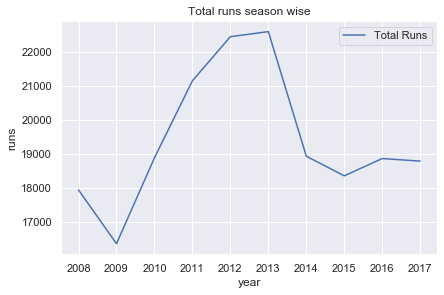

In [65]:
plt.plot(df_deliveries['season'].sort_values().unique(),df_deliveries.groupby('season')['total_runs'].sum(),label = 'Total Runs')
plt.title('Total runs season wise')
plt.legend()
plt.xticks(df_deliveries['season'].sort_values().unique())
plt.xlabel('year')
plt.ylabel('runs')
plt.show()

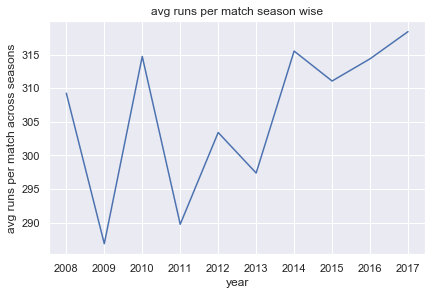

In [66]:
plt.plot(df_deliveries['season'].sort_values().unique(),df_deliveries.groupby('season')['total_runs'].sum()/df_matches.groupby('season').match_id.count())
plt.title('avg runs per match season wise')
plt.xticks(df_deliveries['season'].sort_values().unique())
plt.xlabel('year')
plt.ylabel('avg runs per match across seasons')
plt.show()

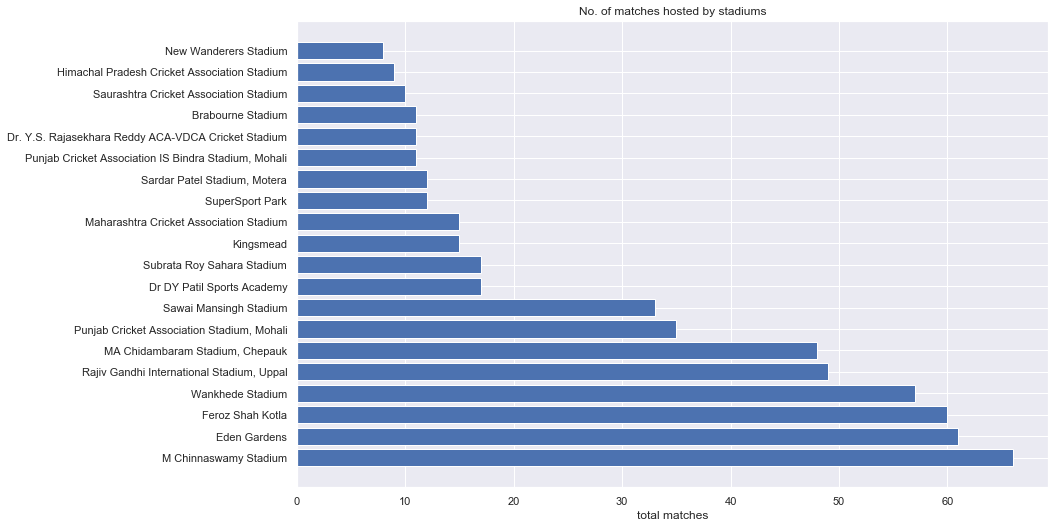

In [67]:
plt.figure(figsize=(12,8))
plt.barh(df_matches['venue'].value_counts().nlargest(20).index,df_matches['venue'].value_counts().nlargest(20))
plt.title('No. of matches hosted by stadiums')
plt.xlabel('total matches')
plt.show()

IPL Winners

In [68]:
for year in range(2008,2018,1):
    print('In {} the IPL winning team was {}'.format(year,df_matches[df_matches['season'] == year]['winner'].iloc[-1]))

In 2008 the IPL winning team was Rajasthan Royals
In 2009 the IPL winning team was Deccan Chargers
In 2010 the IPL winning team was Chennai Super Kings
In 2011 the IPL winning team was Chennai Super Kings
In 2012 the IPL winning team was Kolkata Knight Riders
In 2013 the IPL winning team was Mumbai Indians
In 2014 the IPL winning team was Kolkata Knight Riders
In 2015 the IPL winning team was Mumbai Indians
In 2016 the IPL winning team was Sunrisers Hyderabad
In 2017 the IPL winning team was Mumbai Indians


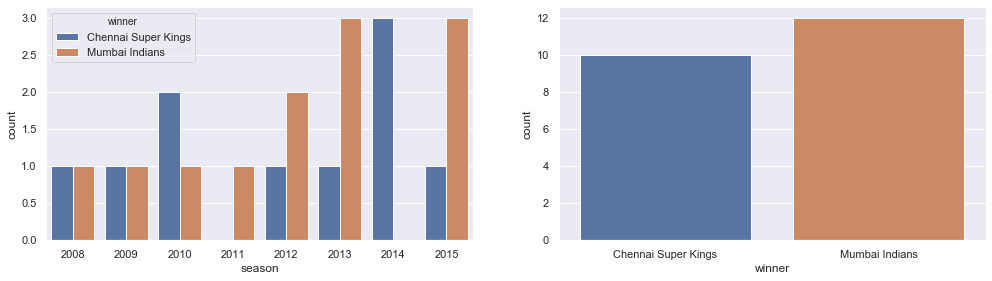

In [69]:
def team1_vs_team2(team1,team2):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
    a = df_matches[((df_matches['team1']==team1)&(df_matches['team2']==team2))|((df_matches['team1']==team2)&(df_matches['team2']==team1))]
    sns.countplot(x= 'season', hue = 'winner', data = a, ax=ax[0])
    sns.countplot(x='winner', data =a, ax =ax[1])
    plt.show()
    
team1_vs_team2('Mumbai Indians', 'Chennai Super Kings')    

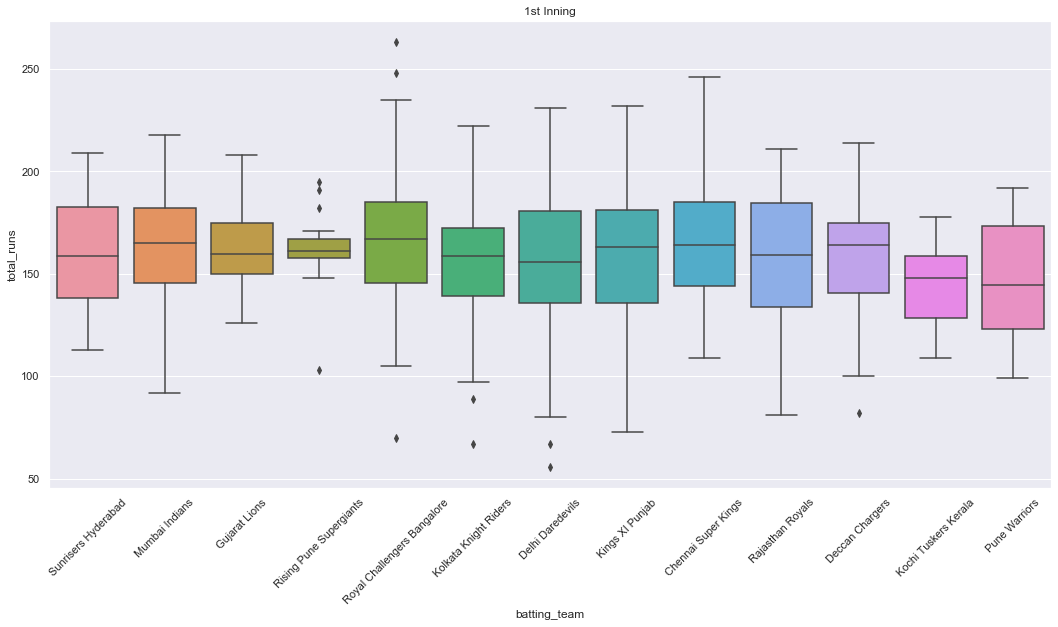

In [70]:
b = df_deliveries.groupby(['match_id','batting_team','inning'])['total_runs'].sum().reset_index()
plt.figure(figsize=(16,8))
b1 = b[b['inning']==1]
sns.boxplot(x = 'batting_team',y='total_runs',data=b1)
plt.title('1st Inning')
plt.xticks(rotation = 45)
plt.show()

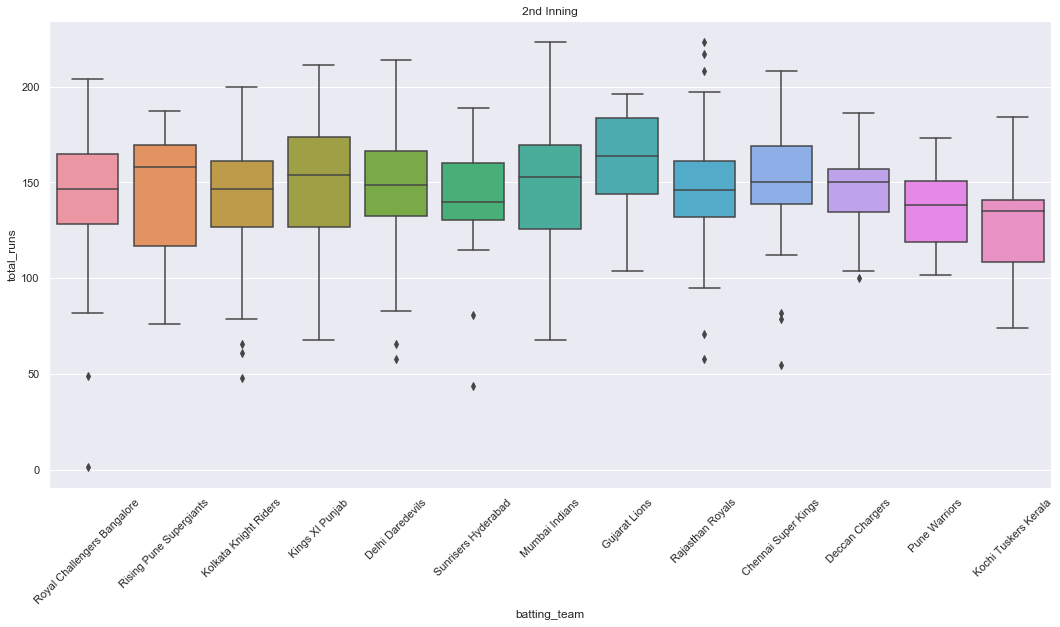

In [71]:
plt.figure(figsize=(16,8))
b2 = b[b['inning']==2]
sns.boxplot(x = 'batting_team',y='total_runs',data=b2)
plt.title('2nd Inning')
plt.xticks(rotation = 45)
plt.show()

In [72]:
b[b['total_runs']<50]

,match_id,batting_team,inning,total_runs
53,27,Royal Challengers Bangalore,2,49
67,34,Gujarat Lions,4,6
69,34,Mumbai Indians,3,11
114,57,Kolkata Knight Riders,2,48
253,126,Kolkata Knight Riders,3,15
255,126,Rajasthan Royals,4,18
383,190,Chennai Super Kings,3,9
385,190,Kings XI Punjab,4,10
780,388,Royal Challengers Bangalore,4,15
782,388,Sunrisers Hyderabad,3,20


In [73]:
df_deliveries[(df_deliveries['match_id']==571)&(df_deliveries['batting_team']=='Royal Challengers Bangalore')]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
135162,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,1,V Kohli,CH Gayle,J Yadav,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2015
135163,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,2,V Kohli,CH Gayle,J Yadav,0,...,0,0,0,1,0,1,NaN,NaN,NaN,2015
135164,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,3,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2015
135165,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,4,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2015
135166,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,5,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2015
135167,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,6,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,1,0,1,NaN,NaN,NaN,2015
135168,571,2,Royal Challengers Bangalore,Delhi Daredevils,2,1,CH Gayle,V Kohli,Z Khan,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2015


In [74]:
df_matches[df_matches['match_id']==571]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id
id,,,,,,,,,,,,,,,,,
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,571


In [75]:
b[b['total_runs']>=200]['batting_team'].value_counts()

Royal Challengers Bangalore    13
Chennai Super Kings            12
Kings XI Punjab                11
Mumbai Indians                  9
Sunrisers Hyderabad             6
Rajasthan Royals                6
Delhi Daredevils                4
Kolkata Knight Riders           4
Deccan Chargers                 1
Gujarat Lions                   1
Name: batting_team, dtype: int64

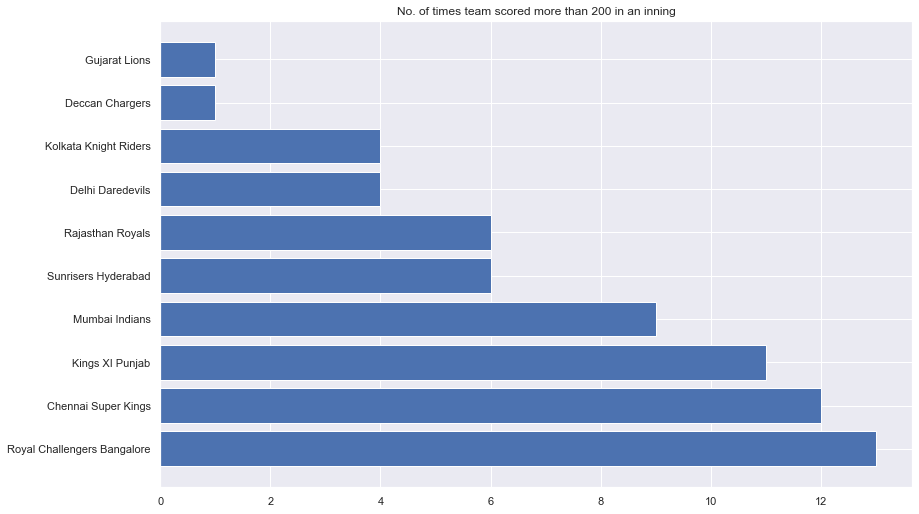

In [76]:
plt.figure(figsize=(12,8))
plt.barh(b[b['total_runs']>=200]['batting_team'].value_counts().index,b[b['total_runs']>=200]['batting_team'].value_counts())
plt.title('No. of times team scored more than 200 in an inning')
plt.show()

In [77]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,2,0,2,NaN,NaN,NaN,2016
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,2016
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,1,0,0,0,1,1,NaN,NaN,NaN,2016
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,1,0,1,NaN,NaN,NaN,2016


In [78]:
overs = []
for over,ball in zip(df_deliveries['over'],df_deliveries['ball']):
    overs.append(str(over-1)+'.'+str(ball))

In [79]:
df_deliveries['overs'] = pd.DataFrame(overs)

In [80]:
df_deliveries1 = df_deliveries.copy()

In [81]:
df_deliveries1.drop(['over','ball'],axis =1,inplace = True)

In [82]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,overs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,0.1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,0.2
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017,0.3
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,0.4
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2016,19.2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,2016,19.3
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2016,19.4
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2016,19.5


In [83]:
df_deliveries1.drop(df_deliveries1[df_deliveries1['is_super_over']==1].index,inplace = True)

In [84]:
df_deliveries1.drop(['is_super_over','batsman',
       'non_striker', 'bowler', 'wide_runs', 'bye_runs', 'legbye_runs',
       'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'dismissal_kind', 'fielder'],axis =1,inplace = True)

In [85]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,season,overs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.2
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,NaN,2017,0.3
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.4
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,NaN,2017,0.5
...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,NaN,2016,19.2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,0,CJ Jordan,2016,19.3
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,NaN,2016,19.4
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,NaN,2016,19.5


In [86]:
df_deliveries2 = df_deliveries1[df_deliveries1['inning']==2]

In [87]:
df_deliveries2.reset_index(drop = True, inplace = True)

# Inning 1 Score predictor 

### Data Preparation

In [88]:
df_deliveries1 = df_deliveries1[df_deliveries1['inning']==1]
df_deliveries1.reset_index(drop = True,inplace = True)

In [89]:
df_deliveries1['total_runs'] = df_deliveries1.groupby('match_id')['total_runs'].cumsum()

C:\Users\ujjwa.DESKTOP-PQQ8MTO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,season,overs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.2
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,NaN,2017,0.3
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,NaN,2017,0.4
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,NaN,2017,0.5
...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,NaN,2016,19.2
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,NaN,2016,19.3
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,NaN,2016,19.4
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,NaN,2016,19.5


In [91]:
df_matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,4
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,S Ravi,VK Sharma,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,632
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,633
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,634


In [92]:
df_deliveries1 = pd.merge(df_deliveries1,df_matches[['match_id','venue']],on ='match_id')

In [93]:
df_deliveries1['overs'] = df_deliveries1['overs'].astype('object')

In [94]:
df_deliveries1['venue'].value_counts().nlargest(20)

M Chinnaswamy Stadium                                   7993
Eden Gardens                                            7404
Feroz Shah Kotla                                        7325
Wankhede Stadium                                        7048
Rajiv Gandhi International Stadium, Uppal               6020
MA Chidambaram Stadium, Chepauk                         5972
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Kingsmead                                               1858
Maharashtra Cricket Association Stadium                 1843
SuperSport Park                                         1486
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1357
Punjab Cricket Associati

In [95]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,season,overs,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.1,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,NaN,2017,0.2,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,NaN,2017,0.3,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,NaN,2017,0.4,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,NaN,2017,0.5,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,NaN,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,NaN,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,NaN,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,NaN,2016,19.5,M Chinnaswamy Stadium


In [96]:
df_deliveries1['overs'] = df_deliveries1['overs'].astype('float64').round(2)

In [97]:
df_deliveries1[(df_deliveries1['match_id']==1)&(df_deliveries1['overs']==19.6)]['total_runs'].values - df_deliveries1[(df_deliveries1['match_id']==1)&(df_deliveries1['overs']==13.6)]['total_runs'].values

array([75], dtype=int64)

In [98]:
df_deliveries1[(df_deliveries1['match_id']==1)&(df_deliveries1['overs']==13.6)]['total_runs'].values

array([132], dtype=int64)

Adding runs in last 6 overs as a feature

In [99]:
runs_last_6 = []
for match in range(1,637,1):
    for i in range(1,len(df_deliveries1[(df_deliveries1['match_id']==match)].loc[:,'total_runs'])-36 + 1,1):
        runs_last_6.append(df_deliveries1[(df_deliveries1['match_id']==match)].iloc[36+i-1]['total_runs'] - df_deliveries1[(df_deliveries1['match_id']==match)].iloc[i-1]['total_runs'])    

In [100]:
len(df_deliveries1[(df_deliveries1['match_id']==1)].loc[:,'total_runs'])-36 + 1

90

In [101]:
len(runs_last_6)

55133

In [102]:
df_deliveries1['player_dismissed'] = df_deliveries1[df_deliveries1['inning']==1]['player_dismissed'].map(lambda x: 0 if pd.isna(x) else 1)

In [103]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,season,overs,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.1,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.2,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.3,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.4,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,0,2017,0.5,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,0,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,0,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,0,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,0,2016,19.5,M Chinnaswamy Stadium


In [104]:
df_deliveries['overs'] = df_deliveries['overs'].astype('float64').round(2)

In [105]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,overs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0.1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0.2
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,2017,0.3
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0.4
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,2017,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,2,0,2,NaN,NaN,NaN,2016,19.2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,CJ Jordan,run out,NV Ojha,2016,19.3
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,1,1,NaN,NaN,NaN,2016,19.4
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,1,0,1,NaN,NaN,NaN,2016,19.5


In [106]:
df_deliveries1.rename(columns = {'player_dismissed':'wicket'}, inplace = True )

In [107]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,wicket,season,overs,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.1,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.2,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.3,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.4,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,0,2017,0.5,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,0,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,0,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,0,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,0,2016,19.5,M Chinnaswamy Stadium


In [108]:
df_deliveries1['wicket'] = df_deliveries1.groupby('match_id')['wicket'].cumsum()

Adding wickets in last 6 overs as a feature

In [109]:
wickets_last_6 = []
for match in range(1,637,1):
    for i in range(1,len(df_deliveries1[(df_deliveries1['match_id']==match)].loc[:,'wicket'])-36 + 1,1):
        wickets_last_6.append(df_deliveries1[(df_deliveries1['match_id']==match)].iloc[36+i-1]['wicket'] - df_deliveries1[(df_deliveries1['match_id']==match)].iloc[i-1]['wicket']) 

In [111]:
# for i in range(1,len(df_deliveries1[(df_deliveries1['match_id']==match)].loc[:,'wicket'])-36+1,1):
#     print(df_deliveries1[(df_deliveries1['match_id']==i)].iloc[36+i-1]['wicket'] - df_deliveries1[(df_deliveries1['match_id']==i)].iloc[(i-1)]['wicket'])

In [112]:
len(wickets_last_6)

55133

In [113]:
df1_final = df_deliveries1.copy()

In [114]:
df1_final.drop(df1_final.index,inplace  = True)

In [115]:
df1_final.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'total_runs',
       'wicket', 'season', 'overs', 'venue'],
      dtype='object')

In [116]:
# sum = 0
# for match in range(1,637,1):
df1_final = pd.concat([pd.DataFrame(df_deliveries1[df_deliveries1['match_id']==match].drop((df_deliveries1[df_deliveries1['match_id']==match].head(36)).index),columns =['match_id', 'inning', 'batting_team', 'bowling_team', 'total_runs','wicket', 'season', 'overs', 'venue']) for match in range(1,637,1)]) 
#     sum = sum + df_deliveries1[df_deliveries1['match_id']==match].drop((df_deliveries1[df_deliveries1['match_id']==match].head(36)).index)['match_id'].count()
#     print(sum)

Dropping first 36 rows because after 36 balls only we are analyzing the score and then will predict final inning score

In [117]:
df_deliveries1[df_deliveries1['match_id']==match].drop((df_deliveries1[df_deliveries1['match_id']==match].head(36)).index)

,match_id,inning,batting_team,bowling_team,total_runs,wicket,season,overs,venue
77939,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,53,0,2016,5.6,M Chinnaswamy Stadium
77940,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,59,0,2016,5.7,M Chinnaswamy Stadium
77941,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,60,0,2016,6.1,M Chinnaswamy Stadium
77942,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,61,0,2016,6.2,M Chinnaswamy Stadium
77943,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,63,0,2016,6.3,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,7,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,7,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,7,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,7,2016,19.5,M Chinnaswamy Stadium


In [118]:
df_deliveries1

,match_id,inning,batting_team,bowling_team,total_runs,wicket,season,overs,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.1,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,2017,0.2,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.3,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0,2017,0.4,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,0,2017,0.5,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,7,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,7,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,7,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,7,2016,19.5,M Chinnaswamy Stadium


In [119]:
df1_final

,match_id,inning,batting_team,bowling_team,total_runs,wicket,season,overs,venue
36,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,58,1,2017,5.5,"Rajiv Gandhi International Stadium, Uppal"
37,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,59,1,2017,5.6,"Rajiv Gandhi International Stadium, Uppal"
38,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,60,1,2017,6.1,"Rajiv Gandhi International Stadium, Uppal"
39,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,60,1,2017,6.2,"Rajiv Gandhi International Stadium, Uppal"
40,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,61,1,2017,6.3,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...
78024,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,194,7,2016,19.2,M Chinnaswamy Stadium
78025,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,200,7,2016,19.3,M Chinnaswamy Stadium
78026,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,201,7,2016,19.4,M Chinnaswamy Stadium
78027,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,202,7,2016,19.5,M Chinnaswamy Stadium


In [120]:
df1_final['wickets_last_6'] = wickets_last_6
df1_final['runs_last_6'] = runs_last_6

In [121]:
df1_final.head(20)

,match_id,inning,batting_team,bowling_team,total_runs,wicket,season,overs,venue,wickets_last_6,runs_last_6
36,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,58,1,2017,5.5,"Rajiv Gandhi International Stadium, Uppal",1,58
37,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,59,1,2017,5.6,"Rajiv Gandhi International Stadium, Uppal",1,59
38,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,60,1,2017,6.1,"Rajiv Gandhi International Stadium, Uppal",1,56
39,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,60,1,2017,6.2,"Rajiv Gandhi International Stadium, Uppal",1,56
40,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,61,1,2017,6.3,"Rajiv Gandhi International Stadium, Uppal",1,55
41,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,62,1,2017,6.4,"Rajiv Gandhi International Stadium, Uppal",1,56
42,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,63,1,2017,6.5,"Rajiv Gandhi International Stadium, Uppal",1,56
43,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,64,1,2017,6.6,"Rajiv Gandhi International Stadium, Uppal",1,56
44,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,65,1,2017,7.1,"Rajiv Gandhi International Stadium, Uppal",1,53
45,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,66,1,2017,7.2,"Rajiv Gandhi International Stadium, Uppal",1,53


In [122]:
df1_final['venue'].value_counts().sort_values(ascending = False).head(20)

M Chinnaswamy Stadium                                   5617
Eden Gardens                                            5208
Feroz Shah Kotla                                        5165
Wankhede Stadium                                        4996
Rajiv Gandhi International Stadium, Uppal               4256
MA Chidambaram Stadium, Chepauk                         4244
Punjab Cricket Association Stadium, Mohali              2987
Sawai Mansingh Stadium                                  2922
Dr DY Patil Sports Academy                              1476
Subrata Roy Sahara Stadium                              1474
Kingsmead                                               1318
Maharashtra Cricket Association Stadium                 1303
SuperSport Park                                         1054
Sardar Patel Stadium, Motera                            1052
Brabourne Stadium                                        984
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      961
Punjab Cricket Associati

Encoding the top 14 venues using OneHotEncoder() of Sklearn as it would be most efficient for the model because most of the matches are played in these grounds

In [123]:
top_14_venue = [x for x in df1_final['venue'].value_counts().sort_values(ascending = False).head(14).index] 
top_14_venue

['M Chinnaswamy Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Wankhede Stadium',
 'Rajiv Gandhi International Stadium, Uppal',
 'MA Chidambaram Stadium, Chepauk',
 'Punjab Cricket Association Stadium, Mohali',
 'Sawai Mansingh Stadium',
 'Dr DY Patil Sports Academy',
 'Subrata Roy Sahara Stadium',
 'Kingsmead',
 'Maharashtra Cricket Association Stadium',
 'SuperSport Park',
 'Sardar Patel Stadium, Motera']

In [124]:
for label in top_14_venue:
    df1_final[label] = np.where(df1_final['venue']==label,1,0)
    
df1_final.drop('venue',axis =1,inplace = True)   

In [125]:
df1_final = df1_final.reset_index(drop = True)

In [130]:
column_name = encoder.get_feature_names(['batting_team','bowling_team'])

In [131]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
enc_df = pd.DataFrame(encoder.fit_transform(df1_final.iloc[:,2:4]).toarray(),columns = column_name)

enc_df

,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kochi Tuskers Kerala,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Pune Warriors,batting_team_Rajasthan Royals,...,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiants,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
encoder.categories_

[array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
        'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
        'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
        'Rajasthan Royals', 'Rising Pune Supergiants',
        'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
 array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
        'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
        'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
        'Rajasthan Royals', 'Rising Pune Supergiants',
        'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)]

In [133]:
df_final = df1_final.join(enc_df)

In [134]:
df_final.drop(['batting_team','bowling_team','batting_team_Chennai Super Kings','bowling_team_Chennai Super Kings'],axis = 1,inplace = True)

In [135]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55133 entries, 0 to 55132
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   match_id                                    55133 non-null  int64  
 1   inning                                      55133 non-null  int64  
 2   total_runs                                  55133 non-null  int64  
 3   wicket                                      55133 non-null  int64  
 4   season                                      55133 non-null  int64  
 5   overs                                       55133 non-null  float64
 6   wickets_last_6                              55133 non-null  int64  
 7   runs_last_6                                 55133 non-null  int64  
 8   M Chinnaswamy Stadium                       55133 non-null  int32  
 9   Eden Gardens                                55133 non-null  int32  
 10  Feroz Shah

In [136]:
df_final.iloc[:,22:46] = df_final.iloc[:,22:46].astype('int16')

In [137]:
df_final

,match_id,inning,total_runs,wicket,season,overs,wickets_last_6,runs_last_6,M Chinnaswamy Stadium,Eden Gardens,...,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiants,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,1,1,58,1,2017,5.5,1,58,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,59,1,2017,5.6,1,59,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,60,1,2017,6.1,1,56,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,60,1,2017,6.2,1,56,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,61,1,2017,6.3,1,55,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55128,636,1,194,7,2016,19.2,4,67,1,0,...,0,0,0,0,0,0,0,0,1,0
55129,636,1,200,7,2016,19.3,4,72,1,0,...,0,0,0,0,0,0,0,0,1,0
55130,636,1,201,7,2016,19.4,4,72,1,0,...,0,0,0,0,0,0,0,0,1,0
55131,636,1,202,7,2016,19.5,4,67,1,0,...,0,0,0,0,0,0,0,0,1,0


In [138]:
df_final['final_score'] = 0

In [139]:
for match in range(1,637,1):
    df_final.final_score[df_final['match_id']==match] = df_final[(df_final['match_id']==match)].iloc[-1,2]

C:\Users\ujjwa.DESKTOP-PQQ8MTO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
df_final

,match_id,inning,total_runs,wicket,season,overs,wickets_last_6,runs_last_6,M Chinnaswamy Stadium,Eden Gardens,...,bowling_team_Kings XI Punjab,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiants,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,final_score
0,1,1,58,1,2017,5.5,1,58,0,0,...,0,0,0,0,0,0,0,1,0,207
1,1,1,59,1,2017,5.6,1,59,0,0,...,0,0,0,0,0,0,0,1,0,207
2,1,1,60,1,2017,6.1,1,56,0,0,...,0,0,0,0,0,0,0,1,0,207
3,1,1,60,1,2017,6.2,1,56,0,0,...,0,0,0,0,0,0,0,1,0,207
4,1,1,61,1,2017,6.3,1,55,0,0,...,0,0,0,0,0,0,0,1,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55128,636,1,194,7,2016,19.2,4,67,1,0,...,0,0,0,0,0,0,0,1,0,208
55129,636,1,200,7,2016,19.3,4,72,1,0,...,0,0,0,0,0,0,0,1,0,208
55130,636,1,201,7,2016,19.4,4,72,1,0,...,0,0,0,0,0,0,0,1,0,208
55131,636,1,202,7,2016,19.5,4,67,1,0,...,0,0,0,0,0,0,0,1,0,208


In [141]:
df_final.drop(['match_id','inning'],axis =1, inplace = True)

In [142]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55133 entries, 0 to 55132
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   total_runs                                  55133 non-null  int64  
 1   wicket                                      55133 non-null  int64  
 2   season                                      55133 non-null  int64  
 3   overs                                       55133 non-null  float64
 4   wickets_last_6                              55133 non-null  int64  
 5   runs_last_6                                 55133 non-null  int64  
 6   M Chinnaswamy Stadium                       55133 non-null  int32  
 7   Eden Gardens                                55133 non-null  int32  
 8   Feroz Shah Kotla                            55133 non-null  int32  
 9   Wankhede Stadium                            55133 non-null  int32  
 10  Rajiv Gand

### Modeling 

Applied Machine learning algorithms for training and testing model

In [143]:
X_train = df_final.drop('final_score',axis =1)[df_final['season']<=2016]
X_test = df_final.drop('final_score',axis =1)[df_final['season']>2016]
y_train = df_final['final_score'][df_final['season']<=2016]
y_test = df_final['final_score'][df_final['season']>2016]

In [144]:
X_train.drop('season',axis =1, inplace = True)
X_test.drop('season',axis = 1,inplace = True)

In [145]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [146]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.6639546860650308
0.6736733786929974


In [147]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=1).fit(X_train, y_train)
print(linlasso.score(X_train, y_train))
print(linlasso.score(X_test,y_test))
prediction_lasso = linlasso.predict(X_test)

0.6356647087300473
0.7065833736104179


In [148]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=1000).fit(X_train, y_train)
print(linridge.score(X_train, y_train))
print(linridge.score(X_test,y_test))
prediction_ridge = linridge.predict(X_test)

0.6603454586403107
0.6999356645066651


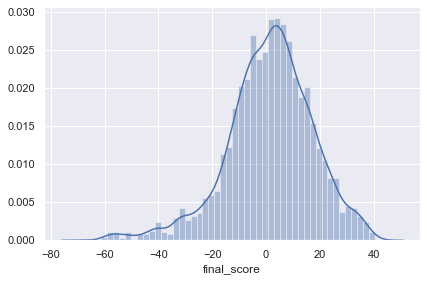

In [149]:
sns.distplot(y_test - prediction_ridge)

In [150]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,prediction_ridge))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction_ridge)))

260.90143440766565
16.152443604843995


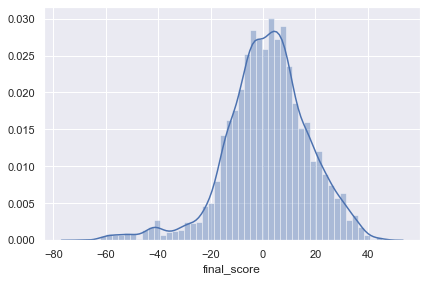

In [151]:
sns.distplot(y_test - prediction_lasso)

In [152]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,prediction_lasso))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction_lasso)))

255.12135115371112
15.972518622737965


In [153]:
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(linlasso, open(filename, 'wb'))

In [154]:
X_test

,total_runs,wicket,overs,wickets_last_6,runs_last_6,M Chinnaswamy Stadium,Eden Gardens,Feroz Shah Kotla,Wankhede Stadium,"Rajiv Gandhi International Stadium, Uppal",...,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiants,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,58,1,5.5,1,58,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,59,1,5.6,1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,60,1,6.1,1,56,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,60,1,6.2,1,56,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,61,1,6.3,1,55,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,121,7,19.4,1,43,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5146,127,7,19.5,1,49,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5147,128,7,19.6,1,49,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5148,129,7,19.7,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
